<a href="https://colab.research.google.com/github/maedehelec/Maedeh/blob/main/Sequential_vs_Functional_API_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sequential Vs Functional API in Keras


* Neural networks are very complex in architecture and computationally expensive.

* Luckily we have Keras, a deep learning API written in Python running on top of Tensorflow, that makes our work of building complex neural networks much easier.

* Keras offers two ways to build neural networks:
  - *Sequential API*: Here we create the model layer-by-layer. It is very simple and easy to use. But sharing of layers or branching of layers is not allowed. Also, you can’t have multiple inputs or outputs.
  - *Functional API*: It is more flexible than the sequential API. It is more powerful than the sequential API in the sense branching or sharing of layers is allowed here. Also it can have multiple inputs and outputs.

## Using Sequential API

In [ ]:
## Import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
## Creating the model
model = Sequential()
model.add(Dense(4, activation='relu')) ##<----- You don't have to specify input size. Just define the hidden layers
model.add(Dense(4, activation='relu'))
model.add(Dense(1))
## defining the optimiser and loss function
model.compile(optimizer='adam', loss='mse')
## training the model
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128, epochs=400)

## Using Functional API

* Here you define an input layer and specify the input size= Input(shape=)
* You define a layer by giving it a name, specifying the number of neurons, activation function, etc.
* Then put the previous layer in a set of parentheses.

In [ ]:
##Import the libraries
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
## Creating the layers
input_layer = Input(shape=(3,))
Layer_1 = Dense(4, activation="relu")(input_layer)
Layer_2 = Dense(4, activation="relu")(Layer_1)
output_layer = Dense(1, activation="linear")(Layer_2)
##Defining the model by specifying the input and output layers
model = Model(inputs=input_layer, outputs=output_layer)
## defining the optimiser and loss function
model.compile(optimizer='adam', loss='mse')
## training the model
model.fit(X_train, y_train, epochs=400, batch_size=128, validation_data=(X_test,y_test))

Because you can define any layer separately and independently the functional API enables us for branching and multiple inputs and outputs. It means you can branch out and add one (or any number of) different layers from any layer.

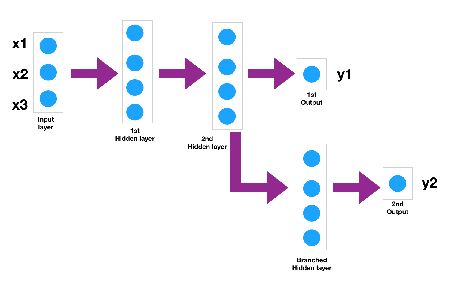

### Use case(Predicting Energy output and exhaust vacuum for a Power Plant)

[Combined Cycle Power Plant Data Set](https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant)

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011) when the power plant was set to work with a full load.
A combined-cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is collected from and has an effect on the Steam Turbine, the other three of the ambient variables affect the GT performance.


Features consist of hourly average ambient variables
 - Temperature (T) in the range 1.81°C and 37.11°C.
 - Ambient Pressure (AP) in the range 992.89-1033.30 millibar.

 - Relative Humidity (RH) in the range 25.56% to 100.16%.
 - Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg.
 - Net hourly electrical energy output (PE) 420.26-495.76 MW.

Let’s build a neural network using functional API to predict Net hourly electrical energy output (**PE**) and Exhaust Vacuum (**V**) with Temperature (T), Ambient Pressure (AP) and Relative Humidity (RH) as inputs.

In [ ]:
##import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

In [ ]:
##import the dataset
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/00294/CCPP.zip'
!unzip /content/CCPP.zip
df = pd.read_excel('/content/CCPP/Folds5x2_pp.xlsx')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
##define a function to get the outputs of the model
def get_outputs(data):
  y1 = data.pop('PE')
  y1 = np.array(y1)
  y2 = data.pop('V')
  y2 = np.array(y2)
  return y1, y2

In [ ]:
# Split the data into train and test with 80 train / 20 test
train, test = train_test_split(df, test_size=0.2, random_state = 1)

#getting the outputs(PE) and (V) of the train and test data
y_train = get_outputs(train)
y_test = get_outputs(test)

#Scaling the inputs
min_max = MinMaxScaler()

X_train = min_max.fit_transform(train)
X_test = min_max.transform(test)

In [ ]:
#Import the libraries for neural networks
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Building the neural network (Here we are using 2 hidden layers and one branched layer with 10 neurons each)
##define input layer
input_layer = Input(shape=(3,), name='input_layer')

##Defining 2 hidden layers
Layer_1 = Dense(10, activation="relu", name='Layer_1')(input_layer)
Layer_2 = Dense(10, activation="relu", name='Layer_2')(Layer_1)

##Defining  output layer y1
y1_output = Dense(1, activation="linear", name='y1_output')(Layer_2)

##Defining Branched layer
Branched_layer = Dense(10, activation="relu", name='Branched_layer')(Layer_2)

##Defining 2nd output layer y2
y2_output = Dense(1, activation="linear", name='y2_output')(Branched_layer)

##Defining the model by specifying the input and output layers
model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

In [ ]:
##summary of the model
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, 3)]                  0         []                            
                                                                                                  
 Layer_1 (Dense)             (None, 10)                   40        ['input_layer[0][0]']         
                                                                                                  
 Layer_2 (Dense)             (None, 10)                   110       ['Layer_1[0][0]']             
                                                                                                  
 Branched_layer (Dense)      (None, 10)                   110       ['Layer_2[0][0]']             
                                                                                            

In [ ]:
## defining the optimiser and loss function
model.compile(optimizer='adam', loss={'y1_output':'mse','y2_output':'mse'})

##training the model
history = model.fit(X_train, y_train, epochs=300, verbose=True,
                    batch_size=128, validation_data=(X_test, y_test))

Epoch 1/300
60/60 [==============================] - 2s 7ms/step - loss: 209931.4375 - y1_output_loss: 206885.7500 - y2_output_loss: 3045.6780 - val_loss: 209677.5469 - val_y1_output_loss: 206684.6406 - val_y2_output_loss: 2992.9165
Epoch 2/300
60/60 [==============================] - 0s 4ms/step - loss: 209362.8594 - y1_output_loss: 206443.3594 - y2_output_loss: 2919.4961 - val_loss: 209026.9688 - val_y1_output_loss: 206220.1562 - val_y2_output_loss: 2806.8145
Epoch 3/300
60/60 [==============================] - 0s 5ms/step - loss: 208379.4688 - y1_output_loss: 205790.5625 - y2_output_loss: 2588.9973 - val_loss: 207484.2031 - val_y1_output_loss: 205241.5312 - val_y2_output_loss: 2242.6838
Epoch 4/300
60/60 [==============================] - 0s 4ms/step - loss: 205888.0469 - y1_output_loss: 204191.7812 - y2_output_loss: 1696.2269 - val_loss: 203908.7344 - val_y1_output_loss: 202880.5781 - val_y2_output_loss: 1028.1593
Epoch 5/300
60/60 [==============================] - 0s 5ms/step - l

In [ ]:
##model predictions
predictions = model.predict(X_test)
predicted_energy = predictions[0]
predicted_vacuum = predictions[1]

60/60 [==============================] - 0s 2ms/step


Text(0, 0.5, 'predicted energy output')

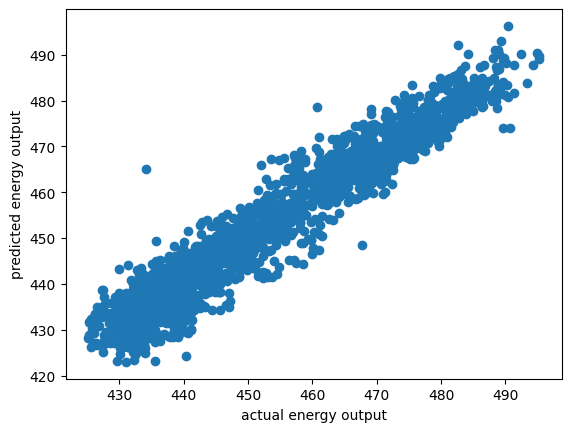

In [ ]:
##Plotting actual vs predicted energy
plt.scatter(y_test[0], predicted_energy)
plt.xlabel('actual energy output')
plt.ylabel('predicted energy output')

Text(0, 0.5, 'predicted exhaust vacuum')

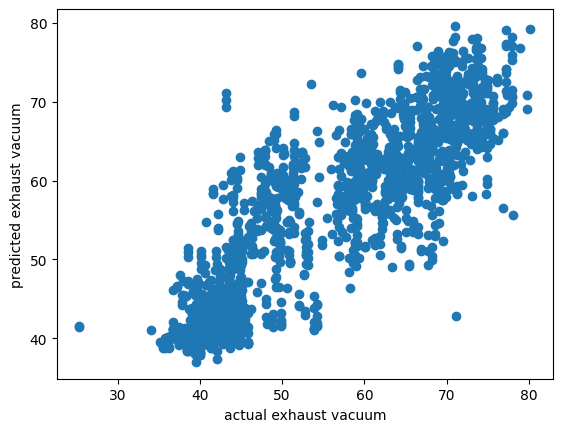

In [ ]:
##Plotting actual vs predicted exhaust vacuum
plt.scatter(y_test[1], predicted_vacuum)
plt.xlabel('actual exhaust vacuum')
plt.ylabel('predicted exhaust vacuum')

In [ ]:
#evaluation
print('r2 score for energy predicted :', r2_score(y_test[0], predicted_energy))
print('r2 score forexhaust vacuum predicted :', r2_score(y_test[1], predicted_vacuum))

r2 score for energy predicted : 0.9253814589609933
r2 score forexhaust vacuum predicted : 0.7837026483424998


### Conclusion:
 - The functional API offers more flexibility and control over the layers than the sequential API.
 - It can be used to predict multiple outputs(i.e output layers) with multiple inputs(i.e input layers))